## Investment Distribution

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [77]:
# read top stocks csv
top_stocks = pd.read_csv('../data/top_stocks.csv').head()
top_stocks

,Ticker Symbol,Stock Price,Profit Margin,Working Capital Ratio,Quick Ratio,Earning Per Share,P/E Ratio,D/E Ratio,Ranking
0,YHOO,33.37,88.0,5.88,588.0,-4.64,-7.19,0.56,68.40
1,FTR,4.66,4.0,5.35,535.0,-0.29,-16.07,3.82,56.64
2,AKAM,52.90,15.0,3.77,377.0,1.80,29.39,0.34,41.14
3,EW,79.21,20.0,4.30,359.0,2.30,34.44,0.62,40.25
4,EBAY,27.75,20.0,3.49,349.0,1.43,19.41,1.70,38.98


## Stock Distribution
- Stock YHOO = 35 % 
- Stock FTR = 30 % 
- Stock AKAM =  15 %
- Stock EW = 10 %
- Stock EBAY = 10 %
- Pie chart = 100 % 


In [30]:
ranking = len(top_stocks['Ranking'])

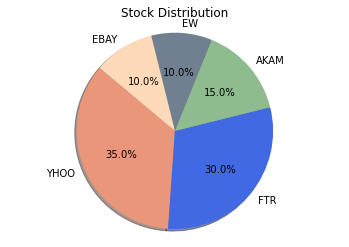

In [39]:
# pie chart with our 5 stocks distribution
top_stocks = plt.pie(
    x=[35,30,15,10,10], 
    labels=["YHOO", "FTR","AKAM","EW","EBAY"],  
    explode=[0,0,0,0,0], 
    colors=["darksalmon", "royalblue", "darkseagreen","slategray","peachpuff"],
    autopct="%1.1f%%",                                       
    shadow=True, 
    startangle=140
)
plt.title('Stock Distribution')

plt.axis("equal")

plt.savefig("../visuals/top_stocks.png")

plt.show()

In [6]:
# investor 
budget = input("How much money do you want to invest today?")

How muh money do you want to invest today? 500


In [62]:
alocation = {
    'YHOO': 0.35,
    'FTR': 0.30,
    'AKAM': 0.15,
    'EW': 0.10,
    'EBAY': 0.10
}

In [63]:
for stock, pct in alocation.items():
    print(f'You should invest ${int(budget)* pct} in the {stock} stock')
    

You should invest $175.0 in the YHOO stock
You should invest $150.0 in the FTR stock
You should invest $75.0 in the AKAM stock
You should invest $50.0 in the EW stock
You should invest $50.0 in the EBAY stock


In [72]:
# API call data frame to here 
top_stocks_final = pd.read_csv('../data/top_stocks_final.csv').head()
top_stocks_final

,Ticker Symbol,Stock Price,Profit Margin,Working Capital Ratio,Quick Ratio,Earning Per Share,P/E Ratio,D/E Ratio,Ranking,Current Closing Price
0,YHOO,33.37,88.0,5.88,588.0,-4.64,-7.19,0.56,68.40,52.58
1,FTR,4.66,4.0,5.35,535.0,-0.29,-16.07,3.82,56.64,0.26
2,AKAM,52.90,15.0,3.77,377.0,1.80,29.39,0.34,41.14,101.46
3,EW,79.21,20.0,4.30,359.0,2.30,34.44,0.62,40.25,88.07
4,EBAY,27.75,20.0,3.49,349.0,1.43,19.41,1.70,38.98,62.31


In [35]:
# ROI 
roi = ((top_stocks_final['Current Closing Price'] - top_stocks_final['Stock Price'])/top_stocks_final['Stock Price'])*100
roi

0       57.566677
1      -94.420601
2       91.795841
3       11.185456
4      124.540541
          ...    
243           NaN
244           NaN
245           NaN
246           NaN
247           NaN
Length: 248, dtype: float64

In [73]:
top_stocks_final['ROI %'] = roi
top_stocks_final_roi = top_stocks_final.round(2)
top_stocks_final_roi

,Ticker Symbol,Stock Price,Profit Margin,Working Capital Ratio,Quick Ratio,Earning Per Share,P/E Ratio,D/E Ratio,Ranking,Current Closing Price,ROI %
0,YHOO,33.37,88.0,5.88,588.0,-4.64,-7.19,0.56,68.40,52.58,57.57
1,FTR,4.66,4.0,5.35,535.0,-0.29,-16.07,3.82,56.64,0.26,-94.42
2,AKAM,52.90,15.0,3.77,377.0,1.80,29.39,0.34,41.14,101.46,91.80
3,EW,79.21,20.0,4.30,359.0,2.30,34.44,0.62,40.25,88.07,11.19
4,EBAY,27.75,20.0,3.49,349.0,1.43,19.41,1.70,38.98,62.31,124.54


In [74]:
# Tell the investor how much money they made 
top_stocks_final_roi['Investment Return'] = (top_stocks_final_roi['ROI %']/100) * (top_stocks_final_roi['Ticker Symbol'].apply(alocation.get)) * int(budget)
top_stocks_final_roi

,Ticker Symbol,Stock Price,Profit Margin,Working Capital Ratio,Quick Ratio,Earning Per Share,P/E Ratio,D/E Ratio,Ranking,Current Closing Price,ROI %,Investment Return
0,YHOO,33.37,88.0,5.88,588.0,-4.64,-7.19,0.56,68.40,52.58,57.57,100.7475
1,FTR,4.66,4.0,5.35,535.0,-0.29,-16.07,3.82,56.64,0.26,-94.42,-141.6300
2,AKAM,52.90,15.0,3.77,377.0,1.80,29.39,0.34,41.14,101.46,91.80,68.8500
3,EW,79.21,20.0,4.30,359.0,2.30,34.44,0.62,40.25,88.07,11.19,5.5950
4,EBAY,27.75,20.0,3.49,349.0,1.43,19.41,1.70,38.98,62.31,124.54,62.2700


In [76]:
total_return = top_stocks_final_roi['Investment Return'].sum()
total_return

95.83249999999998

In [38]:
top_stocks_final_roi.to_csv("../data/top_stocks_final_roi.csv")